<a href="https://colab.research.google.com/github/GalaxyBat/Comp3800/blob/main/GenesisRoss_Project3_COMP3800_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Youtube link: https://youtu.be/2COpY3ckons
#GitHub link:

In [42]:
#Import all the libraries needed
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, make_scorer, f1_score, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm, datasets
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import joblib
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv("ClassicHit.csv")

In [43]:
print(df.dtypes)

Track                object
Artist               object
Year                  int64
Duration              int64
Time_Signature        int64
Danceability        float64
Energy              float64
Key                   int64
Loudness            float64
Mode                  int64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Popularity            int64
Genre                object
dtype: object


Our goal is to figure out how a song features would affect's the songs popularity and if it'll make it more or less popular The attributes that would be most related to a song's popularity would be danceability (how much you can dance to the song), energy(if the song is upbeat or not), the year the song was released, acousticness(measure how much (if any) aucoustic instruments was used in the track), instrumentalness(how much of the song have vocals), and the genre of (the category of the song).

The target variable is popularity.

In [44]:
#Drop unwanted features
df = df.drop(['Track', 'Artist', 'Duration', 'Time_Signature', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Liveness', 'Valence', 'Tempo'], axis=1)
print(df.dtypes)

Year                  int64
Danceability        float64
Acousticness        float64
Instrumentalness    float64
Popularity            int64
Genre                object
dtype: object


In [45]:
#How many nulls there are in each of the remaining features
print(df.isnull().sum())
#There are no nulls in the database

Year                0
Danceability        0
Acousticness        0
Instrumentalness    0
Popularity          0
Genre               0
dtype: int64


In [46]:
#Drop duplicates
classics_df = df.drop_duplicates()

In [47]:
#Check for inconsitent unique values in categorical data
print(classics_df['Genre'].unique())

['Alt. Rock' 'Blues' 'Country' 'Disco' 'EDM' 'Folk' 'Funk' 'Gospel' 'Jazz'
 'Metal' 'Pop' 'Punk' 'R&B' 'Rap' 'Reggae' 'Rock' 'SKA' 'Today' 'World']


In [48]:
#Change the categorical data into numeric values
classics_df['Genre'] = classics_df['Genre'].map({'Alt. Rock': 18, 'Blues': 17, 'Country': 16, 'Disco': 15, 'EDM': 14, 'Folk': 13, 'Funk': 12, 'Gospel': 11, 'Jazz': 10, 'Metal': 9, 'Pop': 8, 'Punk': 7, 'R&B': 6, 'Rap': 5, 'Reggae': 4, 'Rock': 3, 'SKA': 2, 'Today': 1, 'World': 0  })
print(classics_df['Genre'].unique())

[18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]


<ipython-input-48-6b012426decf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classics_df['Genre'] = classics_df['Genre'].map({'Alt. Rock': 18, 'Blues': 17, 'Country': 16, 'Disco': 15, 'EDM': 14, 'Folk': 13, 'Funk': 12, 'Gospel': 11, 'Jazz': 10, 'Metal': 9, 'Pop': 8, 'Punk': 7, 'R&B': 6, 'Rap': 5, 'Reggae': 4, 'Rock': 3, 'SKA': 2, 'Today': 1, 'World': 0  })


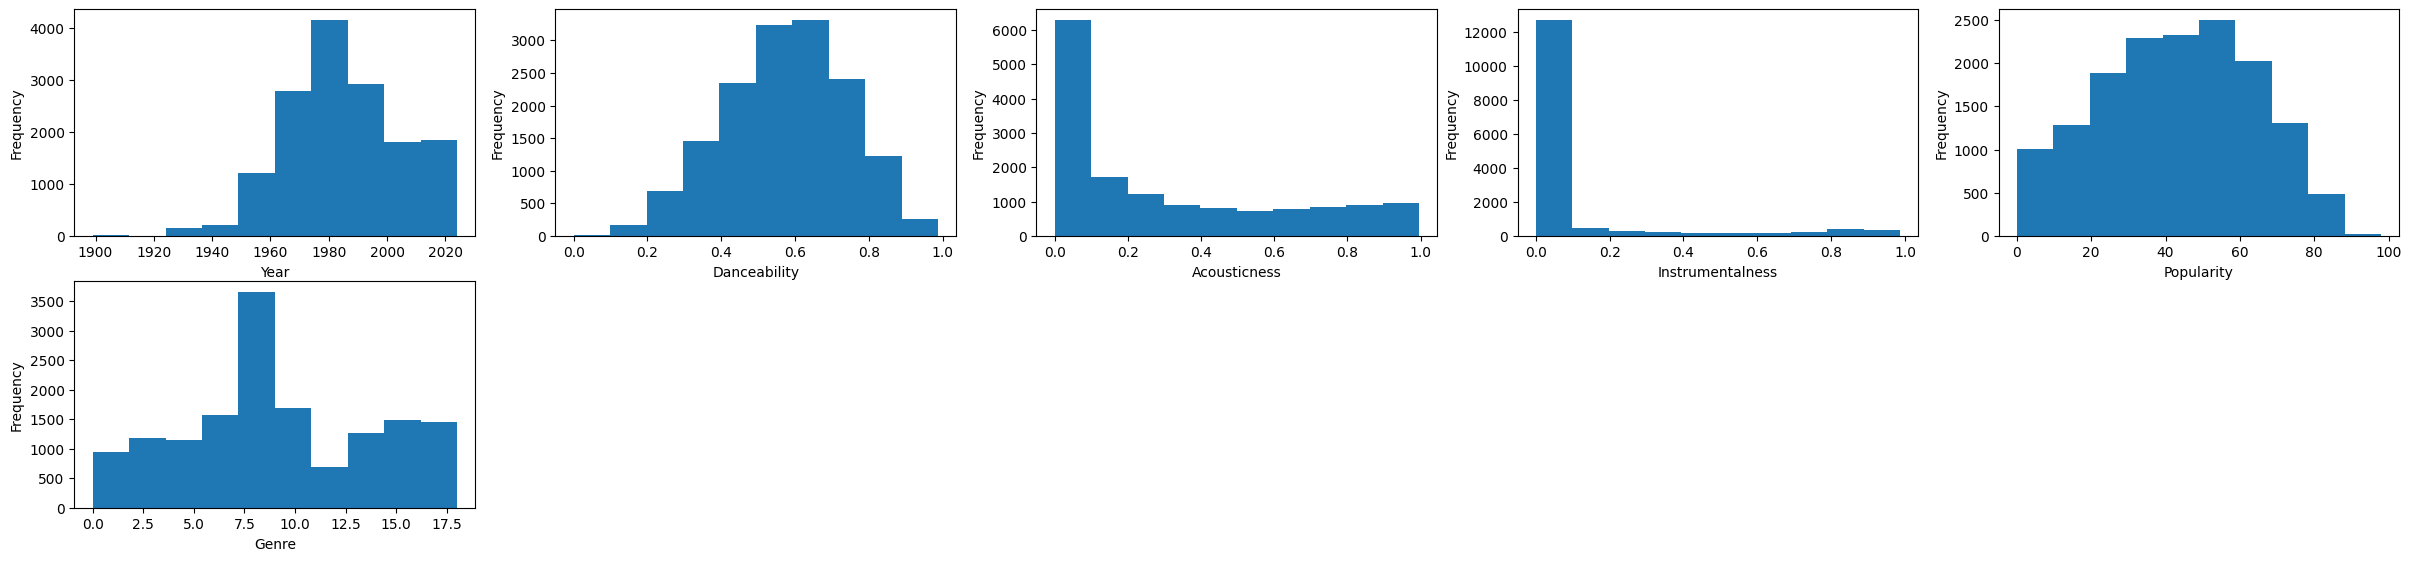

In [49]:
#Check for outliers
fig = plt.figure(figsize=(30, 10))
i=0
for column in classics_df:
    sub=fig.add_subplot(3,5,i+1)
    classics_df[column].plot(kind='hist')
    sub.set_xlabel(column)
    i=i+1
plt.show()
#No outliers shown

In [50]:
#Use ANVO test to reduce the dimension for numerical features
x = classics_df.loc[:, ['Year', 'Danceability', 'Acousticness', 'Instrumentalness']]
y = classics_df.loc[:, 'Popularity']

fs = SelectKBest(score_func=f_classif, k='all')
bestFeatures = fs.fit(x, y)
np.set_printoptions(suppress = True)
print(bestFeatures.scores_)
print(bestFeatures.pvalues_)
#All scores are valuable

[18.15565973  4.44742483  9.97754328  5.19504699]
[0. 0. 0. 0.]


In [51]:
#Use chi-squared test to reduce the dimenion for categorical features
chi = SelectKBest(score_func=chi2, k='all')
x = classics_df.loc[:, ['Genre']]
catFeatures = chi.fit(x, y)
print(catFeatures.scores_)
print(catFeatures.pvalues_)
#All scores are valuable

[789.91730433]
[0.]


In [52]:
#Use correlation analysis to see if there's any high correlated features.
print(classics_df.corr())
#There are no highly correlated features

                      Year  Danceability  Acousticness  Instrumentalness  \
Year              1.000000      0.065376     -0.497714         -0.102704   
Danceability      0.065376      1.000000     -0.104593         -0.131096   
Acousticness     -0.497714     -0.104593      1.000000          0.112822   
Instrumentalness -0.102704     -0.131096      0.112822          1.000000   
Popularity        0.313683      0.127513     -0.224107         -0.163443   
Genre            -0.237767     -0.057020      0.118898          0.055182   

                  Popularity     Genre  
Year                0.313683 -0.237767  
Danceability        0.127513 -0.057020  
Acousticness       -0.224107  0.118898  
Instrumentalness   -0.163443  0.055182  
Popularity          1.000000 -0.092184  
Genre              -0.092184  1.000000  


In [53]:
#Which scoring metric fits best for this prediction problem?
print(classics_df['Popularity'].value_counts())
#The best scoring metric would be MSE

Popularity
49    284
47    281
52    280
48    275
40    267
     ... 
96      2
93      1
95      1
97      1
98      1
Name: count, Length: 98, dtype: int64


In [54]:
#Turn Genre into dummy values
classics_df = pd.get_dummies(classics_df, columns=['Genre'], drop_first=True)
print(classics_df.head())

   Year  Danceability  Acousticness  Instrumentalness  Popularity  Genre_1  \
0  1987         0.616       0.03840          0.000000          40    False   
1  1987         0.770       0.11200          0.003430          43    False   
2  1987         0.593       0.00449          0.000032          12    False   
3  1989         0.861       0.15400          0.000000          47    False   
4  1992         0.622       0.01930          0.006840          43    False   

   Genre_2  Genre_3  Genre_4  Genre_5  ...  Genre_9  Genre_10  Genre_11  \
0    False    False    False    False  ...    False     False     False   
1    False    False    False    False  ...    False     False     False   
2    False    False    False    False  ...    False     False     False   
3    False    False    False    False  ...    False     False     False   
4    False    False    False    False  ...    False     False     False   

   Genre_12  Genre_13  Genre_14  Genre_15  Genre_16  Genre_17  Genre_18  
0     

In [39]:
#Normalize the data
scaler = MinMaxScaler()
normalized_classics_data = scaler.fit_transform(classics_df)
normalized_classics = pd.DataFrame(normalized_classics_data, columns=classics_df.columns)

print(normalized_classics)
print(normalized_classics.dtypes)

        Year  Danceability  Acousticness  Instrumentalness  Popularity  \
0      0.704      0.623482      0.038553          0.000000    0.408163   
1      0.704      0.779352      0.112449          0.003475    0.438776   
2      0.704      0.600202      0.004507          0.000032    0.122449   
3      0.720      0.871457      0.154618          0.000000    0.479592   
4      0.744      0.629555      0.019377          0.006930    0.438776   
...      ...           ...           ...               ...         ...   
15129  0.760      0.687247      0.077409          0.000004    0.479592   
15130  0.768      0.700405      0.255019          0.017629    0.183673   
15131  0.840      0.741903      0.042569          0.000102    0.255102   
15132  0.864      0.704453      0.445783          0.019656    0.081633   
15133  0.864      0.661943      0.305220          0.000238    0.051020   

       Genre_1  Genre_2  Genre_3  Genre_4  Genre_5  ...  Genre_9  Genre_10  \
0          0.0      0.0      0.0 

In [40]:
#Importing gradientBoosting Regressor and getting the cross val and MSE scores
from sklearn.ensemble import GradientBoostingRegressor

x = normalized_classics.drop('Popularity', axis=1)
y = normalized_classics['Popularity']

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(x, y)
classics_scores = cross_val_score(model, x, y, cv=10, scoring='neg_mean_squared_error')

classics_mse_scores = -classics_scores

classics_mse = classics_mse_scores.mean()

print(f'Cross-Validation Scores: {classics_mse_scores}')
print(f'MSE: {classics_mse}')

Cross-Validation Scores: [0.04483338 0.03397169 0.02890083 0.02809985 0.03015337 0.03342499
 0.0304     0.03529626 0.02782274 0.04079158]
MSE: 0.03336946794240388


In [17]:
#What is the  r-squared value?
r_squared_value = model.score(x, y)
print('R-squared: %.4f' % r_squared_value)

R-squared: 0.4105


In [19]:
# Create a DataFrame to display the feature importances
feature_importance = model.feature_importances_
feature_names = x.columns
feature_importance_classics = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_classics = feature_importance_classics.sort_values(by='Importance', ascending=False)
print(feature_importance_classics)

             Feature  Importance
0               Year    0.294803
11           Genre_8    0.230456
6            Genre_3    0.089851
4            Genre_1    0.087932
21          Genre_18    0.062566
2       Acousticness    0.052338
3   Instrumentalness    0.036643
8            Genre_5    0.032128
20          Genre_17    0.022570
12           Genre_9    0.020497
9            Genre_6    0.020401
1       Danceability    0.016140
14          Genre_11    0.011003
5            Genre_2    0.005537
19          Genre_16    0.004142
18          Genre_15    0.003580
16          Genre_13    0.002794
10           Genre_7    0.002708
17          Genre_14    0.001853
7            Genre_4    0.001063
13          Genre_10    0.000994
15          Genre_12    0.000000


<ipython-input-20-0fd9d917eaff>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_classics, palette='viridis')


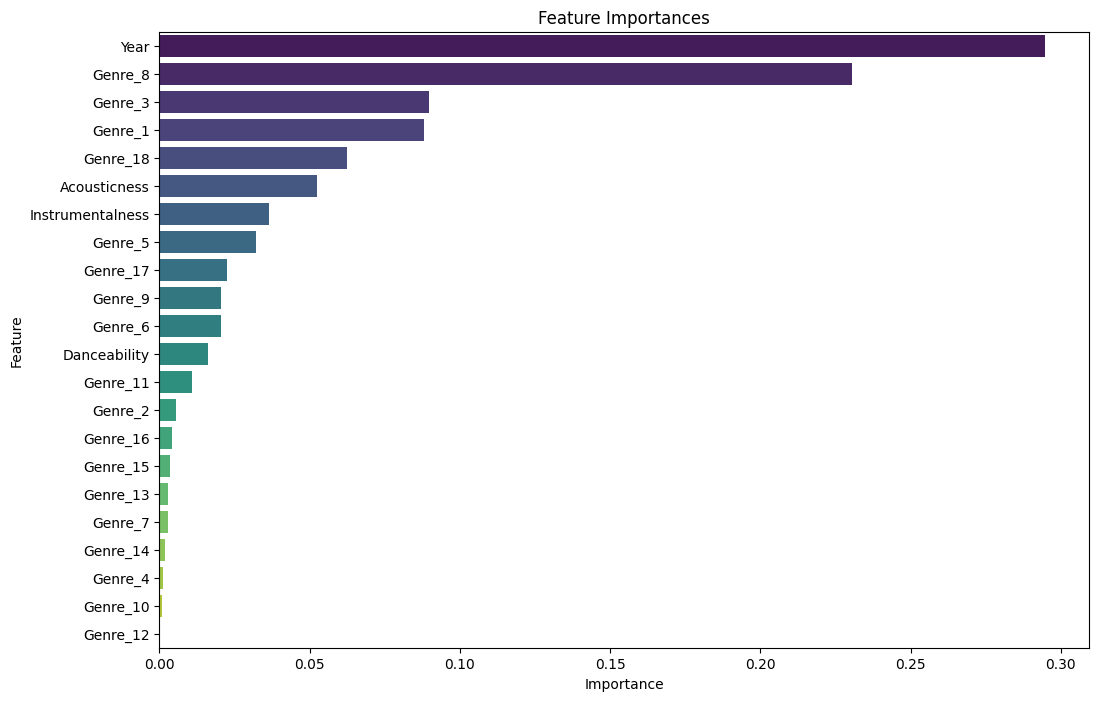

In [20]:
!pip install matplotlib seaborn
import seaborn as sns
# Assuming feature_importance_classics is already created
feature_importance_classics = pd.DataFrame({
    'Feature':
     ['Year', 'Genre_8', 'Genre_3', 'Genre_1', 'Genre_18', 'Acousticness', 'Instrumentalness',
      'Genre_5', 'Genre_17', 'Genre_9', 'Genre_6', 'Danceability', 'Genre_11', 'Genre_2',
      'Genre_16', 'Genre_15', 'Genre_13', 'Genre_7', 'Genre_14', 'Genre_4', 'Genre_10', 'Genre_12'],
      'Importance': [0.294803, 0.230456, 0.089851, 0.087932, 0.062566, 0.052338, 0.036643, 0.032128, 0.022570,
                     0.020497, 0.020401, 0.016140, 0.011003, 0.005537, 0.004142, 0.003580, 0.002794, 0.002708,
                     0.001853, 0.001063, 0.000994, 0.000000]
      })
feature_importance_classics = feature_importance_classics.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_classics, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [25]:
import joblib

from google.colab import files
uploaded = files.upload()

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
joblib.dump(scaler, 'scaler.pkl')

joblib.dump(model, 'popularity_model.pkl')

KeyboardInterrupt: 